### 1. Import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,b_piece_activity,w_doubled_pawns,b_doubled_pawns,doubled_pawns_diff,w_isolated_pawns,b_isolated_pawns,isolated_pawns_diff,both_castled_early,total_captures_early,activity_diff
0,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,36.0,0.0,0.0,0.0,1.0,1.0,0.0,0,15.0,0.0
1,2542,2433,2,0,109,2487.5,1,109,9,16.0,...,20.0,0.0,0.0,0.0,1.0,2.0,-1.0,0,15.0,11.0
2,2404,2534,0,0,130,2469.0,0,-130,0,21.0,...,34.0,0.0,0.0,0.0,1.0,1.0,0.0,1,9.0,-1.0
3,2860,2922,1,0,62,2891.0,0,-62,0,33.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0
4,2752,2395,2,0,357,2573.5,1,357,0,18.0,...,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.0,10.0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2435474, 63)
Target: (2435474,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

#### Scale feature

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Train model

In [6]:
lr_model = LogisticRegression(
    max_iter=2000,
    solver='saga',
    random_state=42,
    n_jobs=-1,
)

In [7]:
start_time = time.time()

lr_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 47.29 seconds (0.79 minutes)


### 5. Evaluate

In [8]:
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.6115 (61.15%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.60      0.64      0.62    198257
        Draw       0.70      0.31      0.43     77234
   White Win       0.61      0.69      0.65    211604

    accuracy                           0.61    487095
   macro avg       0.64      0.55      0.57    487095
weighted avg       0.62      0.61      0.60    487095



In [9]:
lr_sf = pd.read_csv("../data/chess_games_feature_60_sf.csv")
X_sf = lr_sf.drop(['ResultNumeric'], axis=1)
y_sf = lr_sf['ResultNumeric']

In [10]:
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(
    X_sf, y_sf, test_size=0.2, random_state=42, stratify=y_sf
)

In [11]:
scaler = StandardScaler()
X_train_scaled_sf = scaler.fit_transform(X_train_sf)
X_test_scaled_sf = scaler.transform(X_test_sf)

In [12]:
lr_sf = LogisticRegression(
    max_iter=2000,
    solver='saga',
    random_state=42,
    n_jobs=-1,
)

In [13]:
start = time.time()
lr_sf.fit(X_train_scaled_sf, y_train_sf)
time_sf = time.time() - start
print(f"Training completed in {time_sf:.2f} seconds ({time_sf/60:.2f} minutes)")

Training completed in 24.96 seconds (0.42 minutes)


In [14]:
y_pred_sf = lr_sf.predict(X_test_scaled_sf)
acc_sf = accuracy_score(y_test_sf, y_pred_sf)
print(f"\nTest Set Accuracy: {acc_sf:.4f} ({acc_sf*100:.2f}%)\n")

print("Classification Report:\n")
print(classification_report(y_test_sf, y_pred_sf, target_names=['Black Win', 'Draw', 'White Win']))


Test Set Accuracy: 0.6144 (61.44%)

Classification Report:

              precision    recall  f1-score   support

   Black Win       0.60      0.64      0.62      8097
        Draw       0.70      0.31      0.43      3153
   White Win       0.61      0.70      0.65      8750

    accuracy                           0.61     20000
   macro avg       0.64      0.55      0.57     20000
weighted avg       0.62      0.61      0.60     20000



### 6. Confusion Matrix

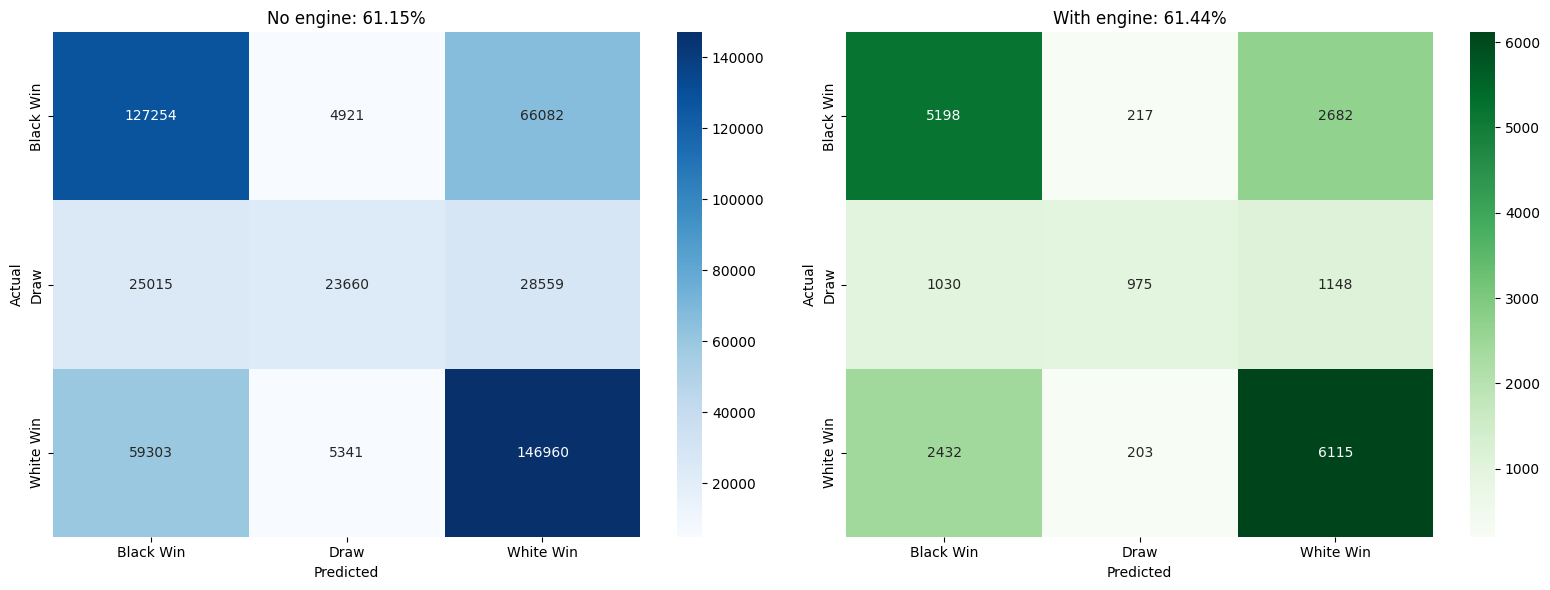

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
axes[0].set_title(f'No engine: {accuracy*100:.2f}%')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

cm_sf = confusion_matrix(y_test_sf, y_pred_sf)
sns.heatmap(cm_sf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
axes[1].set_title(f'With engine: {acc_sf*100:.2f}%')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

### 7. Coefficients (Feature importance for linear models)

                 Feature  Coefficient
6   WhiteRatingAdvantage     0.182450
1               BlackElo     0.134699
0               WhiteElo     0.133921
4              AvgRating     0.127817
2            EventTypeID     0.102437
..                   ...          ...
56    doubled_pawns_diff     0.006038
44         w_development     0.005933
55       b_doubled_pawns     0.005598
20               w_rooks     0.005261
43           center_diff     0.003575

[63 rows x 2 columns]


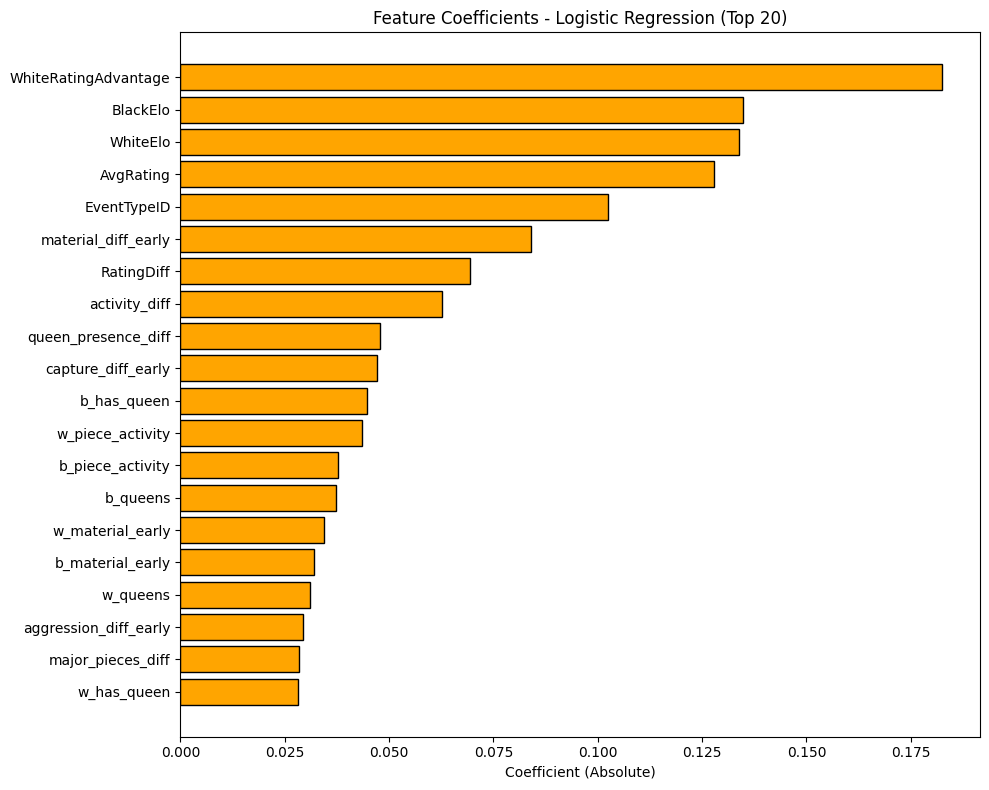

In [16]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.abs(lr_model.coef_).mean(axis=0)  # Average across classes
}).sort_values('Coefficient', ascending=False)

print(coef_df)

k = 20
topk = coef_df.head(k)

plt.figure(figsize=(10, 0.4 * k))
plt.barh(topk['Feature'], topk['Coefficient'], 
         color='orange', edgecolor='black')
plt.xlabel('Coefficient (Absolute)')
plt.title(f'Feature Coefficients - Logistic Regression (Top {k})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()